In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.io as pio
from IPython.display import IFrame
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-assistant-usage-in-student-life-synthetic/ai_assistant_usage_student_life.csv


In [2]:
df = pd.read_csv("/kaggle/input/ai-assistant-usage-in-student-life-synthetic/ai_assistant_usage_student_life.csv")
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


## Top Users of AI by Discipline & Level

In [4]:
df['SessionDate'] = pd.to_datetime(df['SessionDate'])

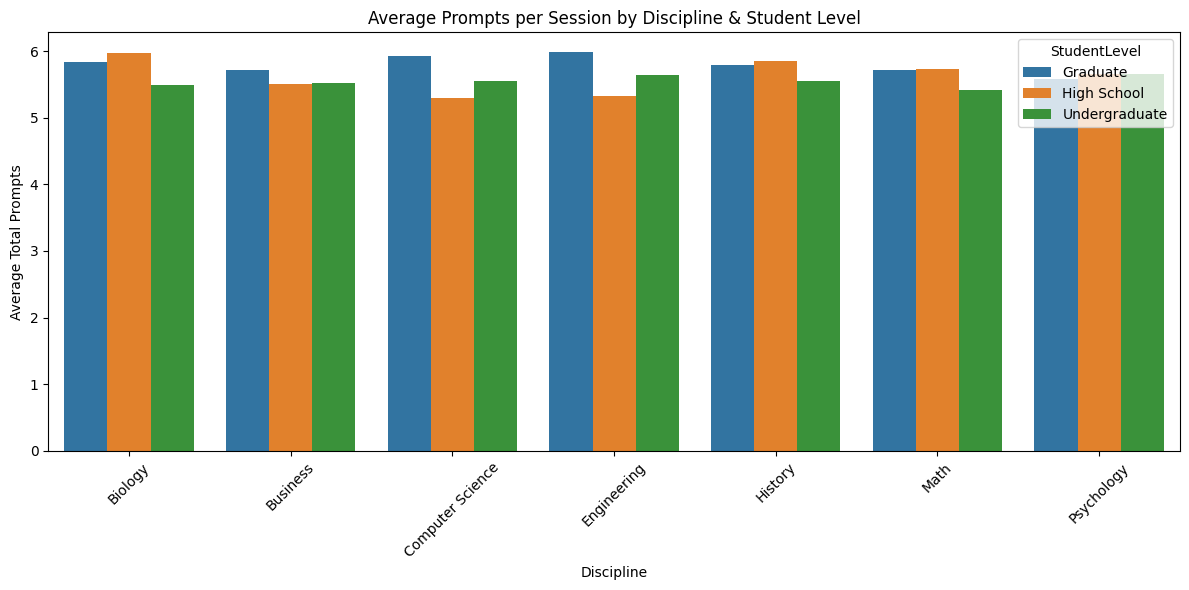

In [5]:
avg_prompts = df.groupby(['Discipline', 'StudentLevel'])['TotalPrompts'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_prompts,
    x='Discipline',
    y='TotalPrompts',
    hue='StudentLevel'
)
plt.xticks(rotation=45)
plt.title('Average Prompts per Session by Discipline & Student Level')
plt.ylabel('Average Total Prompts')
plt.xlabel('Discipline')
plt.tight_layout()
plt.show()

The highest average total prompts are used by graduate engineering students, followed by high school students studying biology. The difference is very small.The lowest is undergraduate math students. 

## What Tasks Are AI Assistants Really Used For?

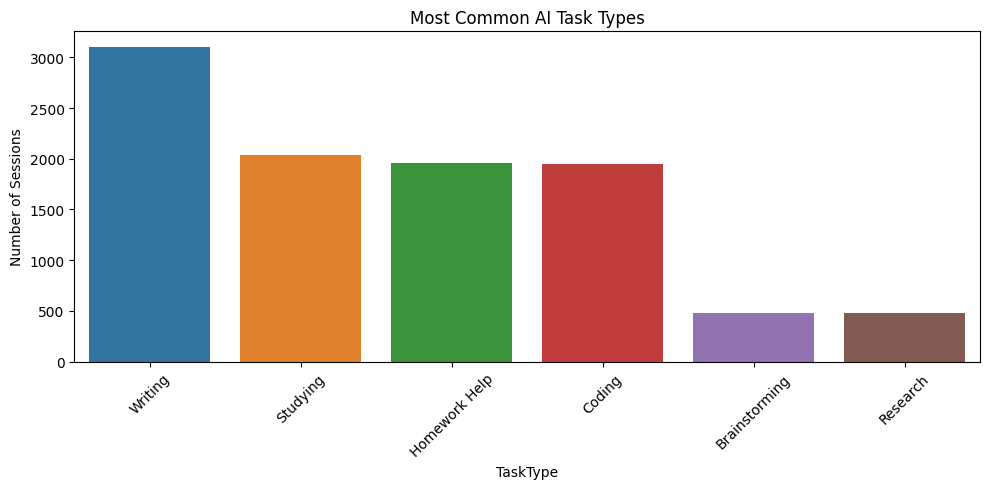

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='TaskType', order=df['TaskType'].value_counts().index)
plt.title('Most Common AI Task Types')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most people use AI for writing purposes while least people use it for brainstorming.

## Who Keeps Coming Back?

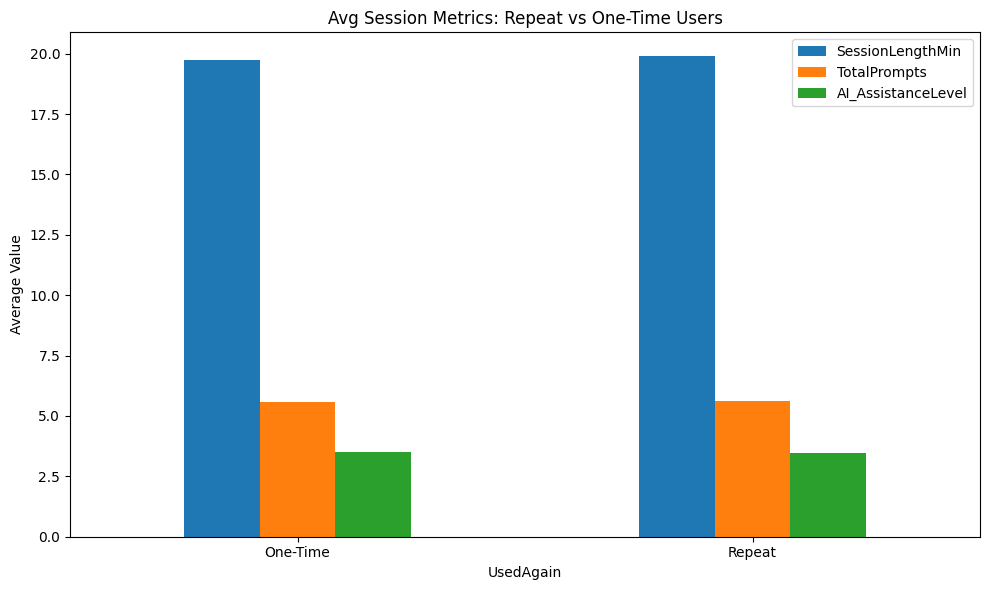

In [7]:
repeat_use = df.groupby('UsedAgain')[['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel']].mean().reset_index()

repeat_use.plot(kind='bar', x='UsedAgain', figsize=(10,6))
plt.title('Avg Session Metrics: Repeat vs One-Time Users')
plt.ylabel('Average Value')
plt.xticks([0,1], ['One-Time', 'Repeat'], rotation=0)
plt.tight_layout()
plt.show() 

Session Length, Total prompts, AI assistance level are slightly higher for repeat users. And, students who returned tended to spend slightly more time per session, submitted more prompts, and requested slightly more AI help — showing a pattern of deeper interaction.

## Is Satisfaction Always Linked to Success?

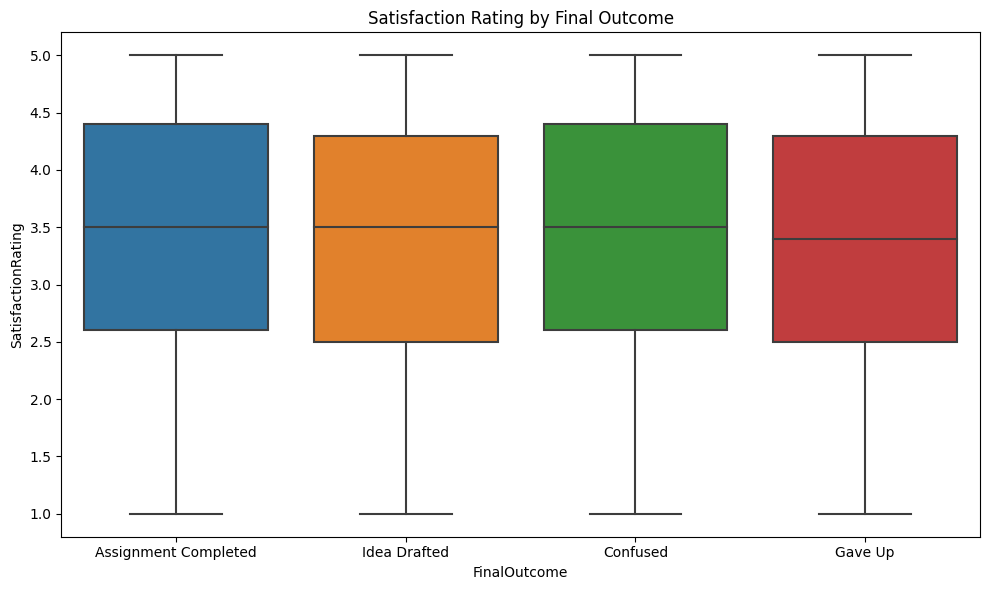

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='FinalOutcome', y='SatisfactionRating')
plt.title('Satisfaction Rating by Final Outcome')
plt.tight_layout()
plt.show()

Median satisfaction is highest when assignment was completed. But the satisfaction range is broad even when students gave up — some still rated it highly. Why? Maybe the tool itself felt useful even if the task failed. While students who completed their tasks were the most satisfied on average, even those who struggled still gave decent ratings — hinting that AI tools are appreciated regardless of the outcome.

## Time & Prompts: Is There a Sweet Spot?

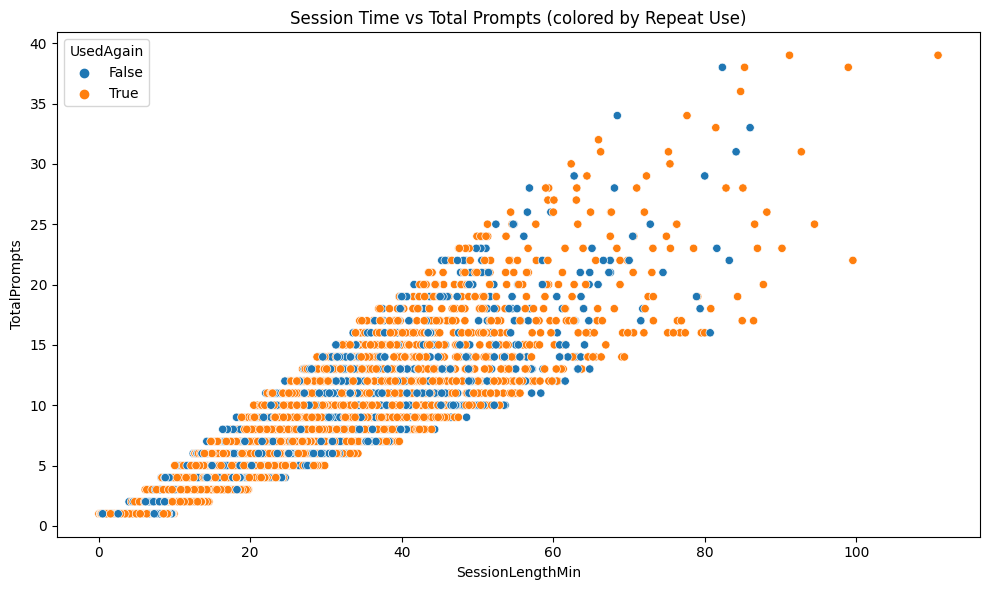

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='SessionLengthMin', y='TotalPrompts', hue='UsedAgain')
plt.title('Session Time vs Total Prompts (colored by Repeat Use)')
plt.tight_layout()
plt.show()

The scatterplot shows how long students used AI and how many prompts they asked. Most students follow a linear pattern: longer sessions = more prompts.Repeat users are more dominant in higher prompt/longer sessions zone → the more they engage, the more likely they come back. SO, The students who interacted more deeply with the AI (longer sessions, more prompts) were more likely to return — suggesting that engagement predicts repeat use.